## 1 užduotis

Remiantis pavyzdžiu, kuriame analizavome iris datasetą, pasirinkite kitą datasetą iš sklearn.datasets (from sklearn.datasets import load_diabetes). Susipažinkite su jame esančiais duomenimis, nusibraižykite scatter plot, kuriame matysite duomenų išsidėstymą. Atlikę šiuos žingsnius apmokykite modelį naudojant RandomForestClassification ir taip pat DecisionTreesClassification.

In [109]:
import numpy as np
import pandas  as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans


353 89
0.7415730337078652
[0.07759792 0.02403919 0.16556837 0.12372685 0.07378449 0.09247977
 0.0959625  0.06049668 0.20708378 0.07926044]


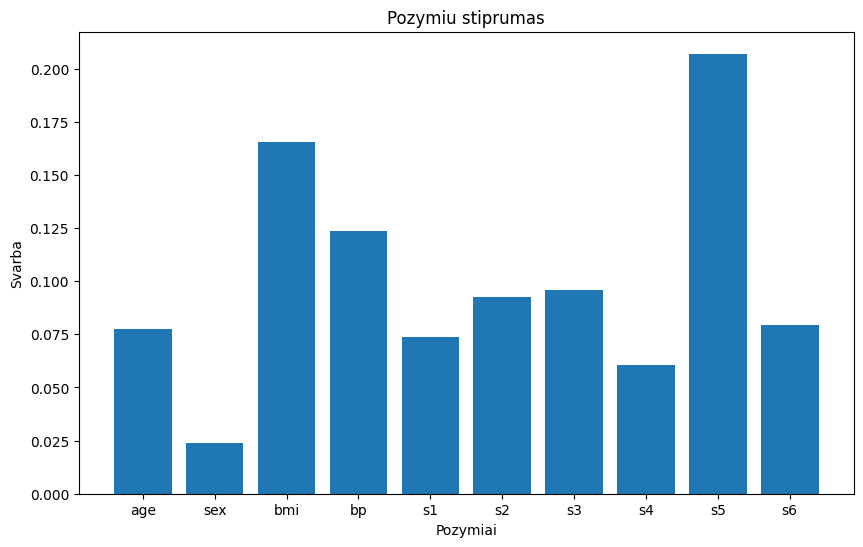

In [130]:
# Henriko sprendimas:

# duomenu pasiruosimas
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target 

Y_diabetes_binary = np.where(y> np.median(y), 1, 0)

# po sio zingsnio jau turime tureti x, y
# print(X)
# print(len(diabetes.feature_names))

# plt.scatter(X[:,0], y)
# plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, Y_diabetes_binary, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(len(y_train), len(y_test))
print(accuracy)

svarbumas = model.feature_importances_
print(svarbumas)

plt.figure(figsize=(10,6))
plt.xticks(range(len(svarbumas)), diabetes.feature_names)
plt.bar(range(len(svarbumas)), svarbumas)
plt.xlabel('Pozymiai')
plt.ylabel('Svarba')
plt.title('Pozymiu stiprumas')
plt.show()

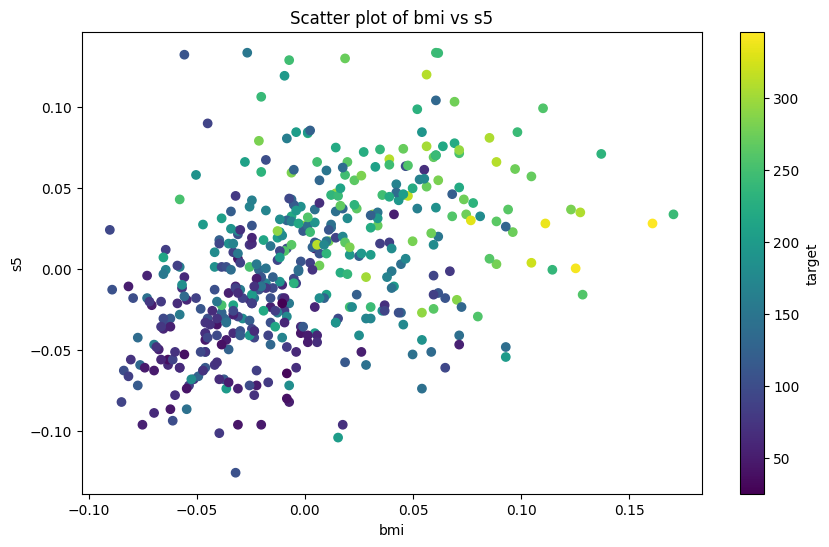

In [88]:
# Ikeliam duomenu rinkini
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target 
# print(X)
# print(diabetes.feature_names)

# Sukuriam DataFrame
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y
# print(df.head())


# Pasirenkam dvi charakteristikas
feature_x = 'bmi'
feature_y = 's5'

plt.figure(figsize=(10,6))
plt.scatter(df[feature_x], df[feature_y], c=y, cmap='viridis')
plt.colorbar(label='target')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f'Scatter plot of {feature_x} vs {feature_y}')
plt.show()


Random Forest modelio tikslumas: 0.7078651685393258
Svarbumai: [0.07276083 0.02142134 0.20596333 0.11651808 0.07935618 0.08707161
 0.08611659 0.05872005 0.181588   0.09048399]


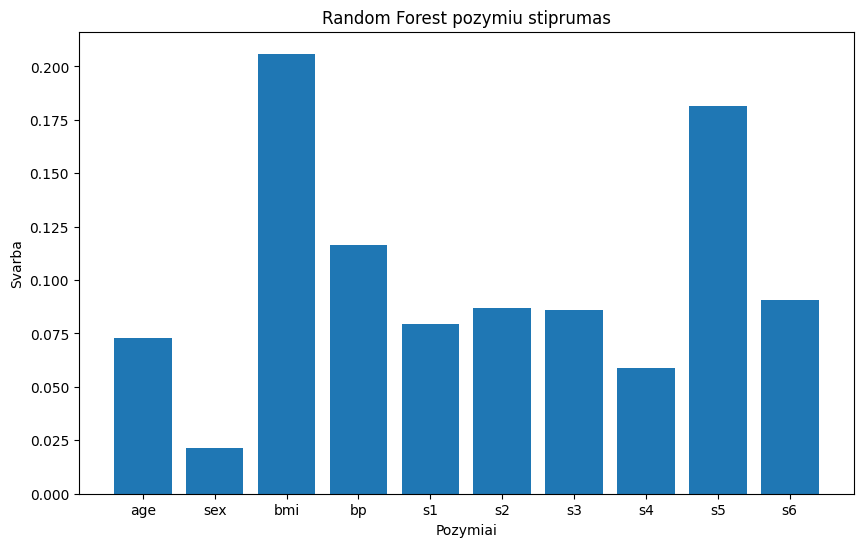

In [89]:
# Binarizuojam pagal mediana
median_target = np.median(y)
binary_target = (y > median_target).astype(int)

# Padalinam i treniravima ir testavima
X_train, X_test, y_train, y_test = train_test_split(X, binary_target, test_size=0.2, random_state=42)

# Apmokymas
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prognoze
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(f'Random Forest modelio tikslumas: {accuracy}')

# Svarbumo vertinimas
svarbumas = model.feature_importances_
print(f'Svarbumai: {svarbumas}')

plt.figure(figsize=(10,6))
plt.xticks(range(len(svarbumas)), diabetes.feature_names)
plt.bar(range(len(svarbumas)), svarbumas)
plt.xlabel('Pozymiai')
plt.ylabel('Svarba')
plt.title('Random Forest pozymiu stiprumas')
plt.show()

Decision Tree modelio tikslumas: 0.6741573033707865
Svarbumai: [0.07871422 0.02379726 0.31177554 0.09739564 0.03703071 0.08003314
 0.07129263 0.03289575 0.16449135 0.10257378]


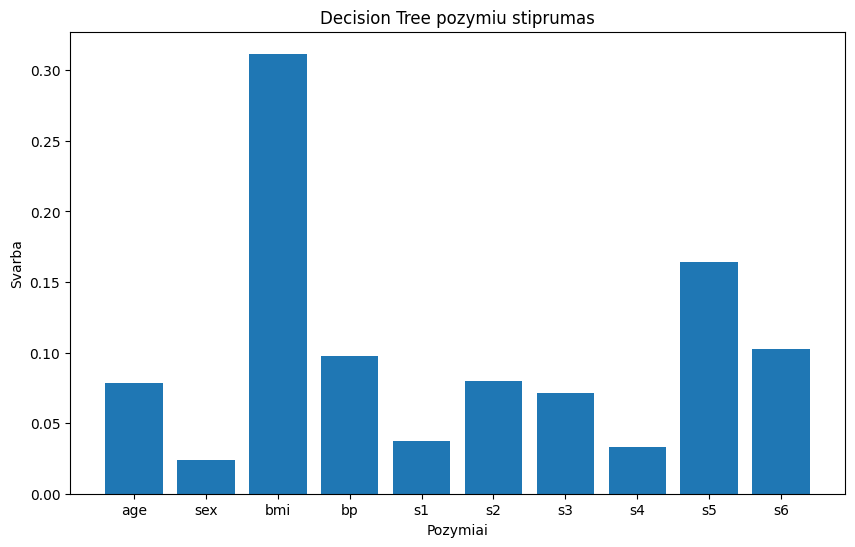

In [91]:
# Apmokymas
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Prognoze
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(f'Decision Tree modelio tikslumas: {accuracy}')

# Svarbumo vertinimas
svarbumas = model.feature_importances_
print(f'Svarbumai: {svarbumas}')

plt.figure(figsize=(10, 6))
plt.xticks(range(len(svarbumas)), diabetes.feature_names)
plt.bar(range(len(svarbumas)), svarbumas)
plt.xlabel('Pozymiai')
plt.ylabel('Svarba')
plt.title('Decision Tree pozymiu stiprumas')
plt.show()

## 2 Užduotis

Parsisiųskite datasetą iš kaggle (arba iš kitų šaltinių). Turėdami jį, atlikite šiuos žingsnius: susipažinkite su jame esančiais duomenimis, nusibraižykite scatter plot, kuriame matysite duomenų išsidėstymą. Atlikę šiuos žingsnius apmokykite modelį naudojant RandomForestClassification ir taip pat DecisionTreesClassification.

In [144]:
wine = pd.read_csv('winequalityN.csv')
wine

Y = wine['quality']
X = wine.drop('quality', axis=1)
X = X.drop('type', axis=1)
X

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, Y_test)
print(accuracy)

0.6169230769230769


In [145]:

model = RandomForestClassifier()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, Y_test)
print(accuracy)

0.6815384615384615


## 3 Užduotis

Parsisiųskite datasetą iš kaggle (arba iš kitų šaltinių). Turėdami jį, atlikite šiuos žingsnius: susipažinkite su jame esančiais duomenimis, nusibraižykite scatter plot, kuriame matysite duomenų išsidėstymą. Šioje užduotyje duomenis jums reikia klasterizuoti, tad turite patys nustatyti kiek gali būti rūšių arba grupių (clusters), turėdami šią informaciją apmokykite modelį naudojant RandomForestClassification ir taip pat DecisionTreesClassification.


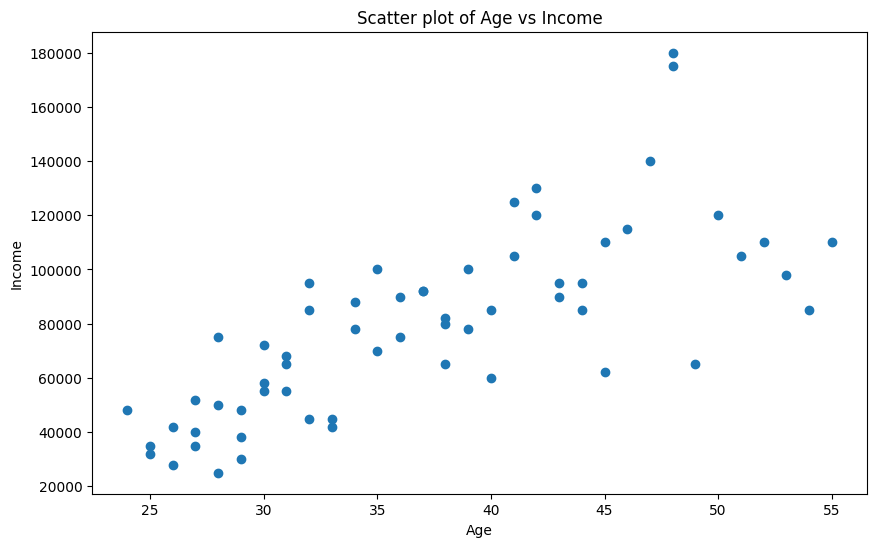

In [176]:
df = pd.read_csv('loan.csv')

plt.figure(figsize=(10,6))
plt.scatter(df['age'], df['income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter plot of Age vs Income')
plt.show()

In [180]:
# Sukuriame KMeans modeli su 3 klasteriais
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df[['age', 'income']])

# Sukuriame nauja stulpeli su klasteriais
df['cluster'] = kmeans.labels_

# Pasiruošiame duomenis  mokymui
X = df[['age', 'income']]
y = df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apmokome modeli
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Tikslumas RandomForestClassifier modeliui
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'RandomForestClassifier modelio tikslumas: {accuracy}')

# Apmokome DecisionTreeClassifier modeli
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Tikslumas DecisionTreeClassifier modeliui
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'DecisionTreeClassifier modelio tikslumas: {accuracy}')



RandomForestClassifier modelio tikslumas: 0.9230769230769231
DecisionTreeClassifier modelio tikslumas: 0.9230769230769231
